# Movie-Recommendation-System

## This is a Content-based Recommendation System
### Works on which movie you choose and will suggest you the same.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
df1 = pd.read_csv('tmdb_5000_credits.csv')

In [4]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


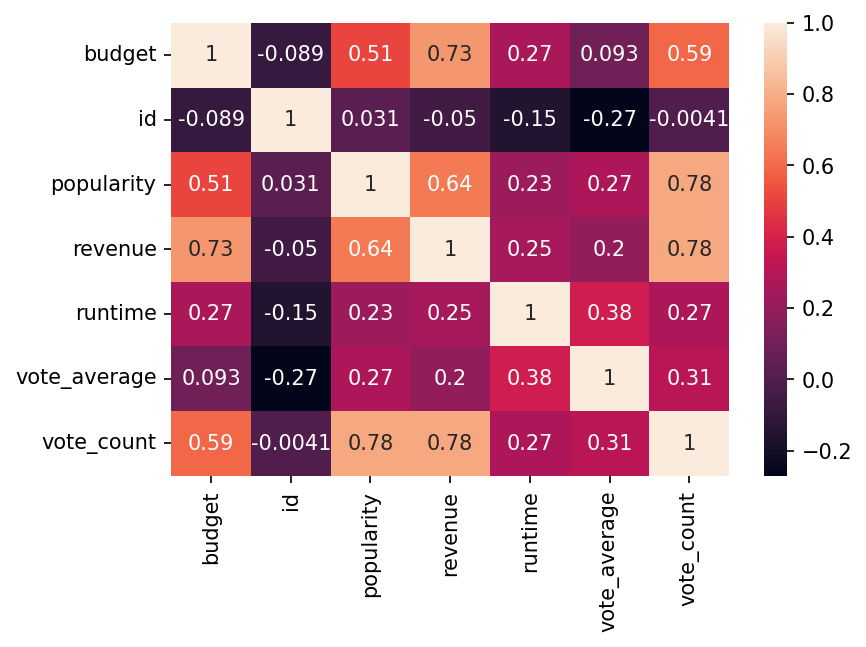

In [5]:
plt.figure(dpi=150)
sns.heatmap(df.corr(),annot=True);

In [9]:
df = df.merge(df1,on='title')

In [11]:
df.shape

(4809, 23)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4806 entries, 0 to 4808
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4806 non-null   int64 
 1   title     4806 non-null   object
 2   overview  4806 non-null   object
 3   genres    4806 non-null   object
 4   keywords  4806 non-null   object
 5   cast      4806 non-null   object
 6   crew      4806 non-null   object
 7   tag       4806 non-null   object
dtypes: int64(1), object(7)
memory usage: 467.0+ KB


# Data Preprocessing 

In [21]:
# On keeping few columns that will be helpful
df = df[['movie_id','title','overview','genres','keywords','cast','crew']]

In [20]:
df.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [28]:
df.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [29]:
df.duplicated().sum()

0

In [33]:
df.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [49]:
# To get the name of the genre from the dictionary out 
# we make a function and apply it on the df['genre']

In [50]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        i['name']
        L.append(i['name'])
    return L

In [52]:
# df['genres'] = df['genres'].apply(convert)

In [53]:
# df['keywords'] = df['keywords'].apply(convert)

In [48]:
df.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [113]:
# df['cast'][0]

In [57]:
def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter !=3:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

In [59]:
df['cast'] = df['cast'].apply(convert3)

In [60]:
df.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [68]:
# df['crew'][0]

In [64]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 


In [66]:
df['crew'] = df['crew'].apply(fetch_director)

In [67]:
df.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]


In [70]:
df['overview'] = df['overview'].apply(lambda x:x.split())

In [83]:
df.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]


In [89]:
df['genres']= df['genres'].apply(lambda x:[i.replace(" ","") for i in x])

In [90]:
df['keywords'] = df['keywords'].apply(lambda x:[i.replace(" ","") for i in x])

In [91]:
df['cast'] = df['cast'].apply(lambda x:[i.replace(" ","") for i in x])

In [92]:
df['crew'] = df['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [93]:
df.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]


In [104]:
df['tag'] = df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']

In [105]:
df.head(3)

,movie_id,title,overview,genres,keywords,cast,crew,tag
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."


In [106]:
new_df = df[['movie_id','title','tag']]

In [107]:
new_df['tag'] = new_df['tag'].apply(lambda x:" ".join(x))

/var/folders/zp/7qktvyk137s1mql4gxlf81s40000gn/T/ipykernel_944/2072057965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag'] = new_df['tag'].apply(lambda x:" ".join(x))


In [108]:
new_df.head(2)

,movie_id,title,tag
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."


In [109]:
new_df['tag'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [111]:
new_df['tag'] = new_df['tag'].apply(lambda x:x.lower())

/var/folders/zp/7qktvyk137s1mql4gxlf81s40000gn/T/ipykernel_944/1436014886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag'] = new_df['tag'].apply(lambda x:x.lower())


# Text Vectorization 

## Coverting Text to Vectors 
Removing all the stop words 

In [131]:
new_df['tag'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [136]:
new_df['tag'][1]

"captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite as it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley goreverbinski"

In [175]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [176]:
vectors = cv.fit_transform(new_df['tag']).toarray()

In [177]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [178]:
cv.fit_transform(new_df['tag']).toarray().shape

(4806, 5000)

In [179]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [183]:
# 5000 features that are formed 
# cv.get_feature_names()

In [154]:
import nltk

In [155]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [184]:
def stem(text):
    y=[]
    
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y) 

In [173]:
new_df['tag'] = new_df['tag'].apply(stem)

/var/folders/zp/7qktvyk137s1mql4gxlf81s40000gn/T/ipykernel_944/4074900442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag'] = new_df['tag'].apply(stem)


In [174]:
# stem('in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron')

In [185]:
# calculating the distance between 2 vector
# using the cosine similarity i.e the angle bet. them 
# Cosine similarity measures the similarity between two vectors of an inner product space.
# less the angel more the similarity 
# more the angel less similar 
# for more dimensionality i.e for 5000 we will use 
# COSINE SIMILARITY

In [186]:
from sklearn.metrics.pairwise import cosine_similarity

In [187]:
cosine_similarity(vectors)

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [188]:
cosine_similarity(vectors).shape


(4806, 4806)

In [189]:
similarity = cosine_similarity(vectors)

In [192]:
similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [193]:
similarity[0].shape

(4806,)

In [203]:
similarity[1]

array([0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
       0.02615329])

In [208]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

# The function that will recommend

In [217]:
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(new_df.iloc[i[0]].title)
        
        

    

In [224]:
recommend('Spectre')

Quantum of Solace
Skyfall
Never Say Never Again
From Russia with Love
Octopussy


In [225]:
import pickle

In [227]:
pickle.dump(new_df,open('movies.pkl','wb'))


In [228]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [231]:
pickle.dump(new_df.to_dict(),open('movies_dict.pkl','wb'))

In [ ]:
import streamlit as st
import pickle
import pandas as pd
import requests

def fetch_poster(movie_id):
    response = requests.get(
        'https://api.themoviedb.org/3/movie/{}?api_key=eab58dd956cfb269aec711b2f2218dab&language=en-US'.format(
            movie_id))
    data = response.json()
    return "https://image.tmdb.org/t/p/w500/" + data['poster_path']


def recommend(movie):
    movie_index = movies[movies['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]

    recommended_movies = []
    recommended_poster = []
    for i in movies_list:
        movie_id = i[0]
        # fetch poster

        recommended_movies.append(movies.iloc[i[0]].title)
        recommended_poster.append(fetch_poster(movie_id))
    return recommended_movies,recommended_poster


movies_dict = pickle.load(open('movies_dict.pkl', 'rb'))

movies = pd.DataFrame(movies_dict)


similarity = pickle.load(open('similarity.pkl', 'rb'))
# title of page
st.title('Movie Recommendation System')

selected_movie_name = st.selectbox(
'Which movie do you choose: ?',
movies['title'].values)

if st.button('Recommend'):
    names,posters = recommend(selected_movie_name)

    col1, col2, col3, col4, col5 = st.beta_columns(5)
    with col1:
        st.text(names[0])
        st.image(posters[0])
    with col2:
        st.text(names[1])
        st.image(posters[1])

    with col3:
        st.text(names[2])
        st.image(posters[2])
    with col4:
        st.text(names[3])
        st.image(posters[3])
    with col5:
        st.text(names[4])
        st.image(posters[4])

